In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.Genre.replace({
    "Male":1,
    "Female":0
}, inplace=True)

In [5]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [6]:
data.drop('CustomerID', axis=1, inplace=True)

In [15]:
data.rename(columns={
    "Genre":'Gender'
}, inplace=True)

In [16]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


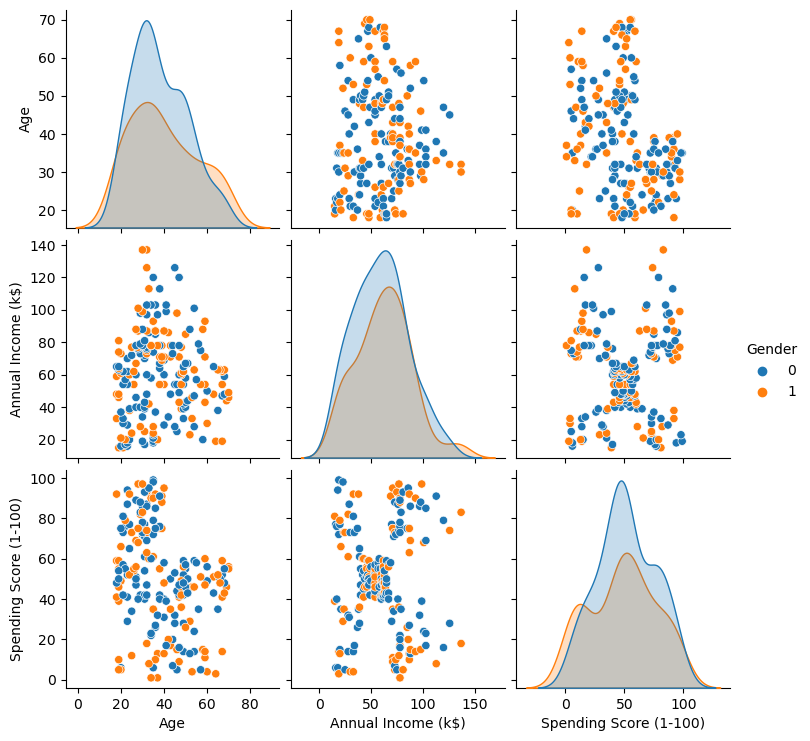

In [33]:
sns.pairplot(data, hue='Gender')

<Axes: xlabel='Gender', ylabel='count'>

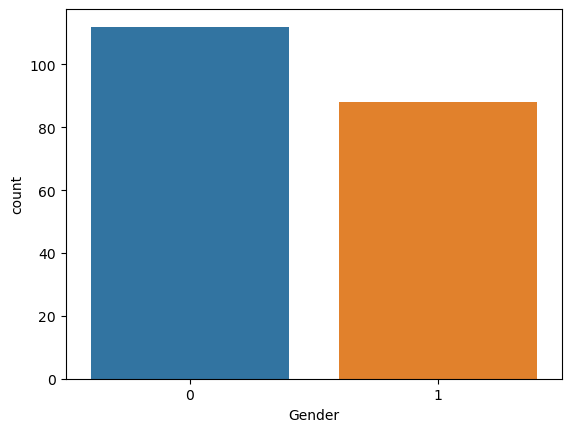

In [22]:
sns.countplot(data, x='Gender')

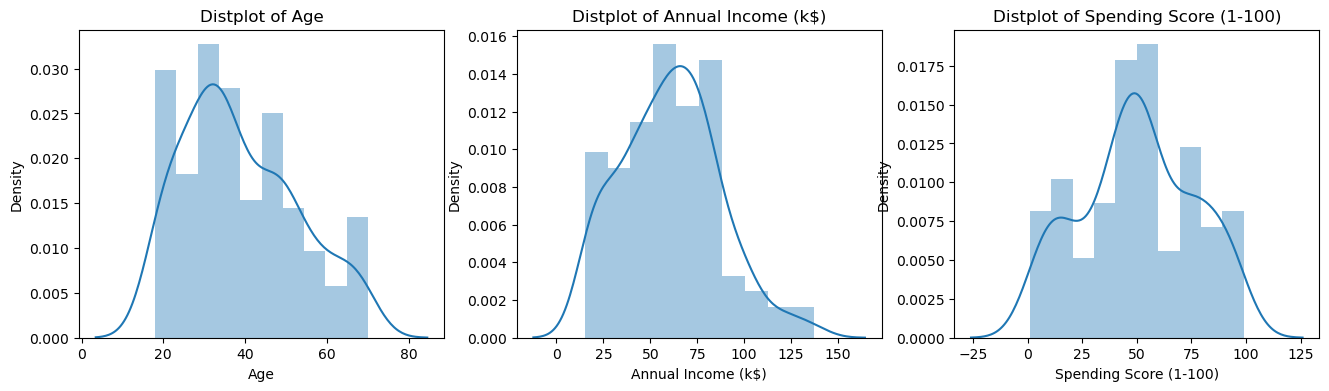

In [34]:
plt.figure(figsize=(16,4))
n=0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.distplot(data[x], bins=10)
    plt.title("Distplot of {}".format(x))
         
plt.show()
    

## Building Model

In [28]:
X = data.iloc[:,-4:]
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


#### We will create model iteratively to capture Silhotute Score and inertia (Sum of Square distances)

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [35]:
km_inertia, km_scores = [], []

for k in range(3,10):
    km = KMeans(n_clusters=k).fit(X)
    km_inertia.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))
    print(f"Processing K-Means with k = {k}, Inertia = {km.inertia_}, Silhoutte Score = {silhouette_score(X, km.labels_)}")

Processing K-Means with k = 3, Inertia = 143391.59236035676, Silhoutte Score = 0.383798873822341
Processing K-Means with k = 4, Inertia = 104422.83498539751, Silhoutte Score = 0.40553486600451777
Processing K-Means with k = 5, Inertia = 75528.58656469136, Silhoutte Score = 0.4402372958247734
Processing K-Means with k = 6, Inertia = 58348.641363315044, Silhoutte Score = 0.45205475380756527
Processing K-Means with k = 7, Inertia = 51181.51147382028, Silhoutte Score = 0.438510412713983
Processing K-Means with k = 8, Inertia = 44357.32664902663, Silhoutte Score = 0.4275788369618678
Processing K-Means with k = 9, Inertia = 40963.922076719566, Silhoutte Score = 0.38555368356867264


### Elbow Method to find optimum K

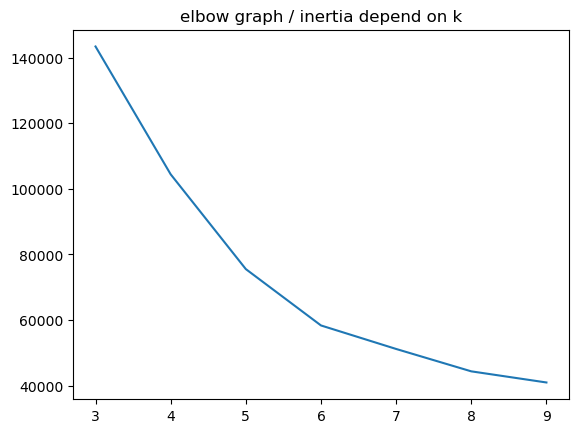

In [39]:
sns.lineplot(x=range(3,10), y=km_inertia)
plt.title("elbow graph / inertia depend on k")
plt.show()

#### Silhoutte Method for finding optimum K

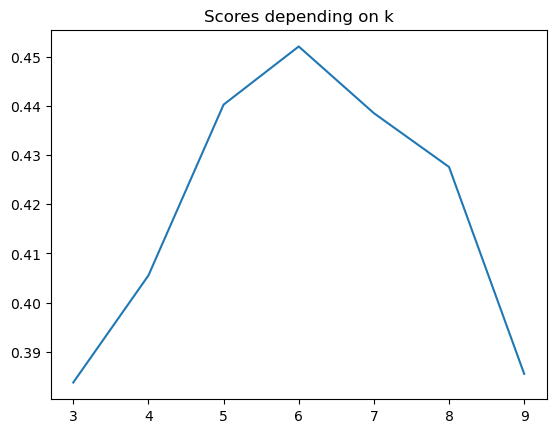

In [42]:
sns.lineplot(x=range(3,10), y=km_scores)
plt.title("Scores depending on k")
plt.show()

###### After analysing both the graphs, we set the number of clusters = 6

In [41]:
km_model = KMeans(n_clusters=6).fit(X)

In [45]:
X['Labels'] = km_model.labels_
X

,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,19,15,39,1
1,1,21,15,81,3
2,0,20,16,6,1
3,0,23,16,77,3
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,2
197,1,32,126,74,0
198,1,32,137,18,2


In [44]:
X.Labels.unique()

array([1, 3, 4, 5, 0, 2])

In [46]:
X.Labels.value_counts()

Labels
4    45
0    39
5    38
2    35
3    22
1    21
Name: count, dtype: int64

### 3D visualization of the Clusters

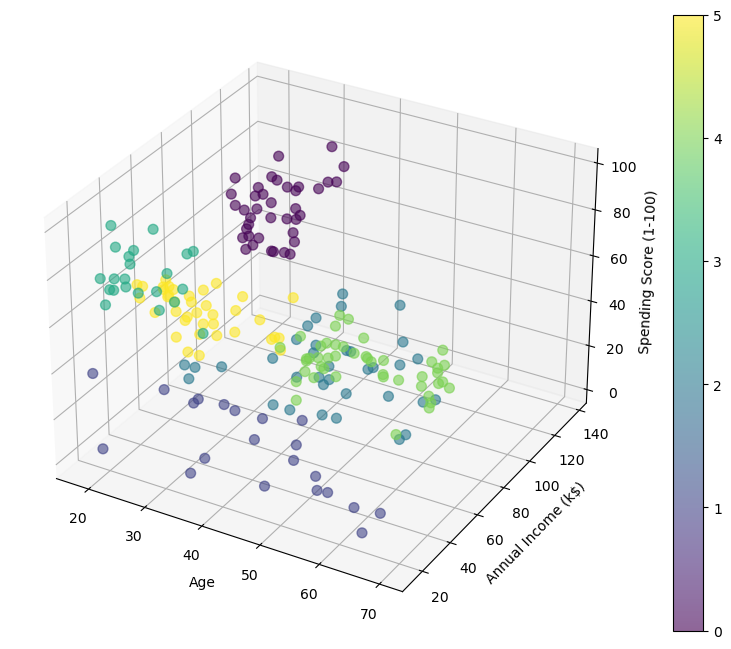

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

xs = X['Age']
ys = X['Annual Income (k$)']
zs = X['Spending Score (1-100)']

im = ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km_model.labels_)

fig.colorbar(im, ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

#### Descriptive analysis

In [83]:
for k in range(6):
    print(f'Cluster nb : {k}')
    print(X[X.Labels == k].describe().iloc[:, 1:-1])
    print('\n\n')

Cluster nb : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   32.692308           86.538462               82.128205
std     3.728650           16.312485                9.364489
min    27.000000           69.000000               63.000000
25%    30.000000           75.500000               74.500000
50%    32.000000           79.000000               83.000000
75%    35.500000           95.000000               90.000000
max    40.000000          137.000000               97.000000



Cluster nb : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  21.000000           21.000000               21.000000
mean   44.142857           25.142857               19.523810
std    13.089254            7.226934               12.769569
min    19.000000           15.000000                3.000000
25%    35.000000           19.000000                6.000000
50%    45.000000           24.000000               1